<a href="https://colab.research.google.com/github/aimanyounises1/NLP_WEB/blob/master/NER_Hebrew.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers

In [2]:
!pip install cuda
!pip install seqeval

ERROR: Could not find a version that satisfies the requirement cuda (from versions: none)
ERROR: No matching distribution found for cuda


In [3]:
!pip install tqdm
!pip install seqeval

In [38]:

import pandas as pd
from sklearn.model_selection import train_test_split
from collections import Counter
train_path = "/content/dataset_hebrew.csv"
data = pd.read_csv(train_path, encoding="utf8").fillna(method="ffill")

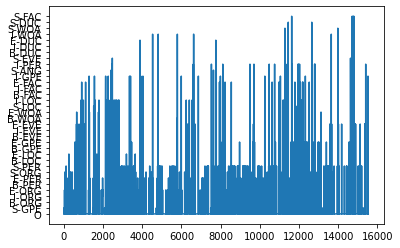

Sentence #
Sentence: 100    [(מה, O), (בין, O), (זה, O), (לבין, O), (גינוי...
Sentence: 101    [(ו, O), (מאמר, O), (מוסגר, O), (:, O), (ה, O)...
Sentence: 102    [(אפשר, O), (למצוא, O), (את, O), (הוא, O), (ב,...
Sentence: 103    [(יש, O), (גם, O), (כללים, O), (:, O), (לעולם,...
Sentence: 104    [(הטפה, O), (ב, O), (נוסח, O), (", O), (ו, O),...
dtype: object


In [39]:
import pandas as pd
import matplotlib.pyplot as plt


data["Tag"] = data["Tag"].apply(lambda row : 
             row.split("^")[0] if "^" in row else row                                
)

data , _ = train_test_split(data , test_size = 0.99 ,random_state=44 , shuffle= False)
training_data, testing_data = train_test_split(data, test_size = 0.2, random_state=44 ,shuffle=False)
plt.plot(data["Tag"])
plt.show()


#labels = set(data["Tag"].values)
#print(labels)
#data.head(50)
words = list()
labels = list()
agg_func = lambda s: [
            (w ,  t)  for w , t  in zip (s["Word"].values.tolist(), s["Tag"].values.tolist())
                         
        ]

data_train = training_data.groupby("Sentence #").apply(agg_func)
data_test = testing_data.groupby("Sentence #").apply(agg_func)

#print(data_train["Tag"]))
print(data_test.head())

#for index , row in data.iterrows():
 # if row["Sentence #"]:
  #  print(row["Sentence #"])
#data_train = list([( row["Word"] + "\n" if row["Sentence #"] else  row["Word"] ,row["Tag"].split("^")[0] if "^" in row["Tag"] else row["Tag"]) for index , row in training_data.iterrows()])
#data_test = list([( row["Word"] + "\n" if row["Sentence #"] else row["Word"] ,row["Tag"].split("^")[0] if "^" in row["Tag"] else row["Tag"]) for index , row in testing_data.iterrows()])

#print(data_train[:10])
#print(data_test[:10])


In [40]:
#print(data["Tag"].values.tolist())
#labels = list()
data.head()
labels_list = set()
data["Tag"].apply(lambda row : 
                labels_list.add(row)         
)

labels_list = list(labels_list)
#labels_list.remove("ה")
print(labels_list)

#print(labels)
#data["Tag"]


['I-FAC', 'I-LOC', 'I-EVE', 'E-WOA', 'S-ORG', 'B-GPE', 'E-ORG', 'B-FAC', 'I-WOA', 'S-GPE', 'B-WOA', 'S-ANG', 'B-DUC', 'E-FAC', 'S-WOA', 'B-ORG', 'S-FAC', 'E-DUC', 'O', 'E-EVE', 'S-PER', 'B-LOC', 'B-EVE', 'B-PER', 'I-GPE', 'E-LOC', 'I-PER', 'S-EVE', 'S-DUC', 'I-DUC', 'E-PER', 'S-LOC', 'E-GPE', 'I-ORG']


In [41]:
import pandas as pd
import numpy as np
from tqdm import tqdm, trange
from collections import Counter
import matplotlib.pyplot as plt
def read_AnEM(path):
    with open(path,'r',encoding='utf-8' , errors='ignore') as f:
      data = []
      sentence = []
      label = []
      for line in f:
        if line=='\n':
          if len(sentence) > 0:
            data.append((sentence,label))
            sentence = []
            label = []
          continue
        splits = line.split()
        #print(splits)
        sentence.append(splits[0])
        label.append(splits[1])
      if len(sentence) > 0:
        data.append((sentence,label))
    return data


In [42]:
print(labels_list)

['I-FAC', 'I-LOC', 'I-EVE', 'E-WOA', 'S-ORG', 'B-GPE', 'E-ORG', 'B-FAC', 'I-WOA', 'S-GPE', 'B-WOA', 'S-ANG', 'B-DUC', 'E-FAC', 'S-WOA', 'B-ORG', 'S-FAC', 'E-DUC', 'O', 'E-EVE', 'S-PER', 'B-LOC', 'B-EVE', 'B-PER', 'I-GPE', 'E-LOC', 'I-PER', 'S-EVE', 'S-DUC', 'I-DUC', 'E-PER', 'S-LOC', 'E-GPE', 'I-ORG']


In [43]:
class Dataset:
    def __init__(
        self,
        name,
        train,
        test,
        label_list,
    ):
        self.name = name
        self.train = train
        self.test = test
        self.label_list = label_list

all_datasets = []

In [44]:
data_AJGT = Dataset("NER_HE", data_train, data_test, labels_list)
all_datasets.append(data_AJGT)


In [45]:
import numpy as np
from seqeval.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

from transformers import AutoConfig, AutoModelForTokenClassification, AutoTokenizer
from transformers import Trainer , TrainingArguments
from transformers.trainer_utils import EvaluationStrategy
from transformers.data.processors.utils import InputFeatures
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from sklearn.utils import resample
import torch


In [46]:
dataset_name ="NER_HE"
model_name = 'onlplab/alephbert-base'
task_name = 'tokenclassification'

In [47]:
for d in all_datasets:
  if d.name==dataset_name:
    selected_dataset = d
    print(selected_dataset.label_list)
    print('Dataset found')
    break

['I-FAC', 'I-LOC', 'I-EVE', 'E-WOA', 'S-ORG', 'B-GPE', 'E-ORG', 'B-FAC', 'I-WOA', 'S-GPE', 'B-WOA', 'S-ANG', 'B-DUC', 'E-FAC', 'S-WOA', 'B-ORG', 'S-FAC', 'E-DUC', 'O', 'E-EVE', 'S-PER', 'B-LOC', 'B-EVE', 'B-PER', 'I-GPE', 'E-LOC', 'I-PER', 'S-EVE', 'S-DUC', 'I-DUC', 'E-PER', 'S-LOC', 'E-GPE', 'I-ORG']
Dataset found


In [48]:
class NERDataset:
  def __init__(self, texts, tags, label_list, model_name, max_length):
    self.texts = texts
    self.tags = tags
    self.label_map = {label: i for i, label in enumerate(label_list)}
    self.pad_token_label_id = torch.nn.CrossEntropyLoss().ignore_index
    # Use cross entropy ignore_index as padding label id so that only
    # real label ids contribute to the loss later.
    self.tokenizer = AutoTokenizer.from_pretrained(model_name)
    self.max_length = max_length

     
  def __len__(self):
    return len(self.texts)
  
  def __getitem__(self, item):
    textlist = self.texts[item]
    tags = self.tags[item]
    #print("tags",tags)
    #print("textlist" , textlist)
    tokens = []
    label_ids = []
    #for word, label in zip(textlist, tags): 
     # print(f"Word : {word} , Label: {label}")
    label = tags
    word = textlist 
    #print(f"Word : {word} , Lable = {label}") 
    word_tokens = self.tokenizer.tokenize(word)
    if len(word_tokens) > 0:
        tokens.extend(word_tokens)
            # Use the real label id for the first token of the word, and padding ids for the remaining tokens
        label_ids.extend([self.label_map[label]] + [self.pad_token_label_id] * (len(word_tokens) - 1))
  
    # Account for [CLS] and [SEP] with "- 2" and with "- 3" for RoBERTa.
    special_tokens_count = self.tokenizer.num_special_tokens_to_add()
    if len(tokens) > self.max_length - special_tokens_count:
      tokens = tokens[: (self.max_length - special_tokens_count)]
      label_ids = label_ids[: (self.max_length - special_tokens_count)]
      
    
    #Add the [SEP] token
    tokens += [self.tokenizer.sep_token]
    label_ids += [self.pad_token_label_id]
    token_type_ids = [0] * len(tokens)

    #Add the [CLS] TOKEN
    tokens = [self.tokenizer.cls_token] + tokens
    label_ids = [self.pad_token_label_id] + label_ids
    token_type_ids = [0] + token_type_ids

    input_ids = self.tokenizer.convert_tokens_to_ids(tokens)

    # The mask has 1 for real tokens and 0 for padding tokens. Only real
    # tokens are attended to.
    attention_mask = [1] * len(input_ids)

    # Zero-pad up to the sequence length.
    padding_length = self.max_length - len(input_ids)

    input_ids += [self.tokenizer.pad_token_id] * padding_length
    attention_mask += [0] * padding_length
    token_type_ids += [0] * padding_length
    label_ids += [self.pad_token_label_id] * padding_length

    assert len(input_ids) == self.max_length
    assert len(attention_mask) == self.max_length
    assert len(token_type_ids) == self.max_length
    assert len(label_ids) == self.max_length

    # if item < 5:
    #   print("*** Example ***")
    #   print("tokens:", " ".join([str(x) for x in tokens]))
    #   print("input_ids:", " ".join([str(x) for x in input_ids]))
    #   print("attention_mask:", " ".join([str(x) for x in attention_mask]))
    #   print("token_type_ids:", " ".join([str(x) for x in token_type_ids]))
    #   print("label_ids:", " ".join([str(x) for x in label_ids]))
    
    return {
        'input_ids' : torch.tensor(input_ids, dtype=torch.long),
        'attention_mask' : torch.tensor(attention_mask, dtype=torch.long),
        'token_type_ids' : torch.tensor(token_type_ids, dtype=torch.long),
        'labels' : torch.tensor(label_ids, dtype=torch.long)       
    }

In [49]:
label_map = { v:index for index, v in enumerate(selected_dataset.label_list) }
print(label_map)
for i in range(len(selected_dataset.train)):
    for x in selected_dataset.train[i]:
      print(x[0])
    break
#for x in selected_dataset.test:
 # print(x[0] , x[1])
  #break
 
#print(selected_dataset.train[:10])
train_dataset = NERDataset(
    texts = [x[0] for i in range(len(selected_dataset.train)) for x in selected_dataset.train[i]],
    tags = [x[1] for i in range(len(selected_dataset.train)) for x in selected_dataset.train[i]],
    label_list = selected_dataset.label_list,
    model_name = model_name,
    max_length = 256
    )

test_dataset = NERDataset(
    texts = [x[0] for i in range(len(selected_dataset.test)) for x in selected_dataset.test[i]],
    tags = [x[1] for i in range(len(selected_dataset.test)) for x in selected_dataset.test[i]],
    label_list=selected_dataset.label_list,
    model_name=model_name,
    max_length=256
    )
print("@@@@@@")
print(test_dataset.texts[:10])


{'I-FAC': 0, 'I-LOC': 1, 'I-EVE': 2, 'E-WOA': 3, 'S-ORG': 4, 'B-GPE': 5, 'E-ORG': 6, 'B-FAC': 7, 'I-WOA': 8, 'S-GPE': 9, 'B-WOA': 10, 'S-ANG': 11, 'B-DUC': 12, 'E-FAC': 13, 'S-WOA': 14, 'B-ORG': 15, 'S-FAC': 16, 'E-DUC': 17, 'O': 18, 'E-EVE': 19, 'S-PER': 20, 'B-LOC': 21, 'B-EVE': 22, 'B-PER': 23, 'I-GPE': 24, 'E-LOC': 25, 'I-PER': 26, 'S-EVE': 27, 'S-DUC': 28, 'I-DUC': 29, 'E-PER': 30, 'S-LOC': 31, 'E-GPE': 32, 'I-ORG': 33}
עשרות
אנשים
מגיעים
מ
תאילנד
ל
ישראל
כש
הם
נרשמים
כ
מתנדבים
,
אך
למעשה
משמשים
עובדים
שכירים
זולים
.
"
תהיה
נקמה
ו
בגדול
.


loading configuration file https://huggingface.co/onlplab/alephbert-base/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/c311cde38d67060cfab2730d54b583d4d7b55c2bf556914da310d274b806e592.6df48d87da51ccd2d7121eb1fd6ebc489d701a2baed5666032a314e019327cb0
Model config BertConfig {
  "_name_or_path": "onlplab/alephbert-base",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.15.0",
  "type_vocab_size": 1,
  "use_cache": true,
  "vocab_size": 52000
}

loading file https://huggingface.co/onlplab/alephbert-

@@@@@@
['מה', 'בין', 'זה', 'לבין', 'גינוי', 'ציני', 'ל', 'ה', 'אופן', 'ש']


In [50]:
from transformers import BertForSequenceClassification
def model_init():
    return AutoModelForTokenClassification.from_pretrained(model_name, return_dict=True, num_labels=len(label_map))

In [51]:
inv_label_map = {i: label for i, label in enumerate(labels_list)}

def align_predictions(predictions, label_ids):
    preds = np.argmax(predictions, axis=2)
    #print(preds.shape)
    batch_size, seq_len = preds.shape

    out_label_list = [[] for _ in range(batch_size)]
    preds_list = [[] for _ in range(batch_size)]

    for i in range(batch_size):
        for j in range(seq_len):
            if label_ids[i, j] != torch.nn.CrossEntropyLoss().ignore_index:
                out_label_list[i].append(inv_label_map[label_ids[i][j]])
                preds_list[i].append(inv_label_map[preds[i][j]])

    return preds_list, out_label_list

def compute_metrics(p):
    preds_list, out_label_list = align_predictions(p.predictions,p.label_ids)
    #print(classification_report(out_label_list, preds_list,digits=4))
    print(accuracy_score(out_label_list, preds_list))
    return {
        "accuracy_score": accuracy_score(out_label_list, preds_list),
        "precision": precision_score(out_label_list, preds_list),
        "recall": recall_score(out_label_list, preds_list),
        "f1": f1_score(out_label_list, preds_list),
    }

In [52]:
training_args = TrainingArguments("./train")
training_args.evaluate_during_training = True
training_args.adam_epsilon = 1e-8
training_args.learning_rate = 5e-5
training_args.fp16 = True
training_args.per_device_train_batch_size = 16
training_args.per_device_eval_batch_size = 16
training_args.gradient_accumulation_steps = 2
training_args.num_train_epochs= 8


print(len(selected_dataset.train))
steps_per_epoch = (len(selected_dataset.train)// (training_args.per_device_train_batch_size * training_args.gradient_accumulation_steps))
total_steps = steps_per_epoch * training_args.num_train_epochs
print(steps_per_epoch)
print(total_steps)
#Warmup_ratio
warmup_ratio = 0.1
training_args.warmup_steps = total_steps*warmup_ratio

training_args.evaluation_strategy = EvaluationStrategy.EPOCH
# training_args.logging_steps = 200
training_args.save_steps = 100000 #don't want to save any model
training_args.seed = 42
training_args.disable_tqdm = False
training_args.lr_scheduler_type = 'cosine'

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


500
15
120


In [53]:

trainer = Trainer(
    args=training_args,
    train_dataset=train_dataset, 
    eval_dataset=test_dataset, 
    model_init=model_init,
    compute_metrics=compute_metrics,

)

loading configuration file https://huggingface.co/onlplab/alephbert-base/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/c311cde38d67060cfab2730d54b583d4d7b55c2bf556914da310d274b806e592.6df48d87da51ccd2d7121eb1fd6ebc489d701a2baed5666032a314e019327cb0
Model config BertConfig {
  "_name_or_path": "onlplab/alephbert-base",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4",
    "5": "LABEL_5",
    "6": "LABEL_6",
    "7": "LABEL_7",
    "8": "LABEL_8",
    "9": "LABEL_9",
    "10": "LABEL_10",
    "11": "LABEL_11",
    "12": "LABEL_12",
    "13": "LABEL_13",
    "14": "LABEL_14",
    "15": "LABEL_15",
    "16": "LABEL_16",
    "17": "LABEL_17",
    "18": "LABEL_18",
    "19

In [54]:
trainer.train()

loading configuration file https://huggingface.co/onlplab/alephbert-base/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/c311cde38d67060cfab2730d54b583d4d7b55c2bf556914da310d274b806e592.6df48d87da51ccd2d7121eb1fd6ebc489d701a2baed5666032a314e019327cb0
Model config BertConfig {
  "_name_or_path": "onlplab/alephbert-base",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4",
    "5": "LABEL_5",
    "6": "LABEL_6",
    "7": "LABEL_7",
    "8": "LABEL_8",
    "9": "LABEL_9",
    "10": "LABEL_10",
    "11": "LABEL_11",
    "12": "LABEL_12",
    "13": "LABEL_13",
    "14": "LABEL_14",
    "15": "LABEL_15",
    "16": "LABEL_16",
    "17": "LABEL_17",
    "18": "LABEL_18",
    "19

Step,Training Loss,Validation Loss


KeyboardInterrupt: ignored

In [55]:
torch.save(trainer.model , "HeBERT_NER.pth")

In [59]:
from transformers import pipeline

model = torch.load("/content/HeBERT_NER.pth" , map_location=torch.device('cpu'))
tokenizer = AutoTokenizer.from_pretrained(model_name)
text = '''שלום אני  דור לומד באוניבירסטת אריאל'''
keys = list(label_map.keys())
values = list(label_map.values())
nlp = pipeline('ner',model = model , tokenizer = tokenizer)
output = nlp(text)
print(type(label_map))
print(label_map)
for entity in output:
  print(entity)
  split = entity['entity'].split("_")
  index = int(split[-1])
  print(index)
  print(keys[index])


loading configuration file https://huggingface.co/onlplab/alephbert-base/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/c311cde38d67060cfab2730d54b583d4d7b55c2bf556914da310d274b806e592.6df48d87da51ccd2d7121eb1fd6ebc489d701a2baed5666032a314e019327cb0
Model config BertConfig {
  "_name_or_path": "onlplab/alephbert-base",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.15.0",
  "type_vocab_size": 1,
  "use_cache": true,
  "vocab_size": 52000
}

loading file https://huggingface.co/onlplab/alephbert-

<class 'dict'>
{'I-FAC': 0, 'I-LOC': 1, 'I-EVE': 2, 'E-WOA': 3, 'S-ORG': 4, 'B-GPE': 5, 'E-ORG': 6, 'B-FAC': 7, 'I-WOA': 8, 'S-GPE': 9, 'B-WOA': 10, 'S-ANG': 11, 'B-DUC': 12, 'E-FAC': 13, 'S-WOA': 14, 'B-ORG': 15, 'S-FAC': 16, 'E-DUC': 17, 'O': 18, 'E-EVE': 19, 'S-PER': 20, 'B-LOC': 21, 'B-EVE': 22, 'B-PER': 23, 'I-GPE': 24, 'E-LOC': 25, 'I-PER': 26, 'S-EVE': 27, 'S-DUC': 28, 'I-DUC': 29, 'E-PER': 30, 'S-LOC': 31, 'E-GPE': 32, 'I-ORG': 33}
{'entity': 'LABEL_18', 'score': 0.9147705, 'index': 1, 'word': 'שלום', 'start': 0, 'end': 4}
18
O
{'entity': 'LABEL_18', 'score': 0.8815814, 'index': 2, 'word': 'אני', 'start': 5, 'end': 8}
18
O
{'entity': 'LABEL_18', 'score': 0.8883878, 'index': 3, 'word': 'דור', 'start': 10, 'end': 13}
18
O
{'entity': 'LABEL_18', 'score': 0.85252005, 'index': 4, 'word': 'לומד', 'start': 14, 'end': 18}
18
O
{'entity': 'LABEL_4', 'score': 0.45898485, 'index': 5, 'word': 'באוני', 'start': 19, 'end': 24}
4
S-ORG
{'entity': 'LABEL_6', 'score': 0.22698417, 'index': 6, 'w